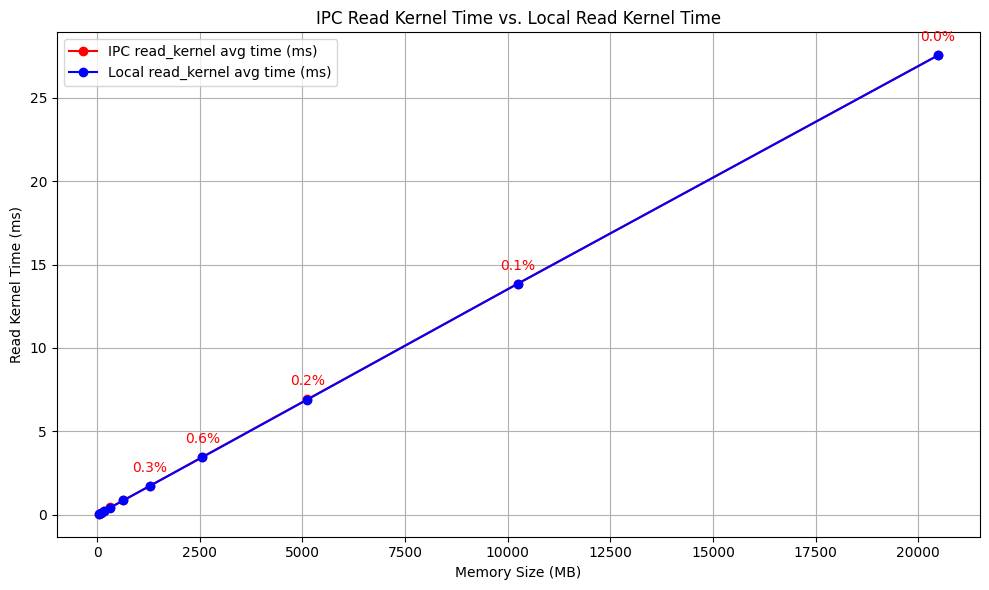

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")
df["Size_MB"] = df["Size_Bytes"] / (1024 * 1024)

df["Relative_Diff"] = (df["IPC_Time_ms"] - df["Local_Time_ms"]) / df["Local_Time_ms"]


plt.figure(figsize=(10, 6))

plt.plot(df["Size_MB"], df["IPC_Time_ms"], marker='o', color='red', label='IPC read_kernel avg time (ms)')
plt.plot(df["Size_MB"], df["Local_Time_ms"], marker='o', color='blue', label='Local read_kernel avg time (ms)')

for _, row in df.tail(5).iterrows():
    annotation = f"{row['Relative_Diff']*100:.1f}%"
    plt.annotate(annotation, 
                    (row["Size_MB"], row["IPC_Time_ms"]),
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center', 
                    color='red')

plt.xlabel("Memory Size (MB)")
plt.ylabel("Read Kernel Time (ms)")
plt.title("IPC Read Kernel Time vs. Local Read Kernel Time")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("ipc_latency_plot.png")
plt.show()


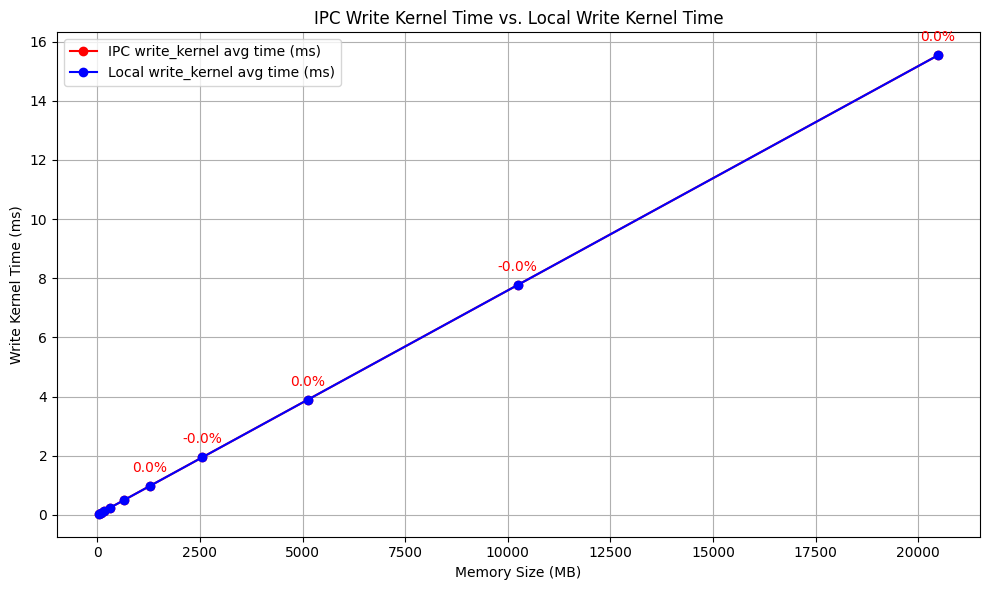

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results_write.csv")
df["Size_MB"] = df["Size_Bytes"] / (1024 * 1024)

df["Relative_Diff"] = (df["IPC_Write_Kernel_Time_ms"] - df["Local_Write_Kernel_Time_ms"]) / df["Local_Write_Kernel_Time_ms"]


plt.figure(figsize=(10, 6))
plt.plot(df["Size_MB"], df["IPC_Write_Kernel_Time_ms"], marker='o', color='red', label='IPC write_kernel avg time (ms)')
plt.plot(df["Size_MB"], df["Local_Write_Kernel_Time_ms"], marker='o', color='blue', label='Local write_kernel avg time (ms)')

for _, row in df.tail(5).iterrows():
    annotation = f"{row['Relative_Diff']*100:.1f}%"
    plt.annotate(annotation, 
                 (row["Size_MB"], row["IPC_Write_Kernel_Time_ms"]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 color='red')

plt.xlabel("Memory Size (MB)")
plt.ylabel("Write Kernel Time (ms)")
plt.title("IPC Write Kernel Time vs. Local Write Kernel Time")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("ipc_write_kernel_latency_plot.png")
plt.show()
